In [1]:
!nvidia-smi

Wed Jul 10 21:39:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A6000               Off | 00000000:01:00.0 Off |                  Off |
| 30%   48C    P2              95W / 300W |  35201MiB / 49140MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!gpustat

Error on querying NVIDIA devices. Use --debug flag to see more details.
[Errno 0] Error


# Phi2

## Load all data

In [3]:
categories = ['gender', 'race-color', 'religion']

phi_stereoset_results_dir = [f'../results/stereoset_CDA_processed/phi2/{category}' for category in categories]
phi_crows_results = [f'../results/crows_CDA/crows_m-CDAPhi2LMHeadModel_c-microsoft_phi-2_t-{category}.json' for category in categories]
phi_training_output_dir = [f'../results/CDA_FT/phi2/{category}' for category in ['gender', 'race', 'religion']]

phi_before_debias_stereoset_results_dir = '../results/stereoset_processed/stereoset_m-PhiForCausalLM_c-microsoft_phi-2_s-42.json'
phi_before_debias_crows_results_dir = '../results/crows/crows_m-PhiForCausalLM_c-microsoft_phi-2.json'

In [4]:
# Load datas from directories
import json

# Load training data
training_logs = {}
for category_dir in phi_training_output_dir:
    with open(f'{category_dir}/trainer_state.json', 'r') as f:
        training_logs[category_dir.split('/')[-1]] = json.load(f)

# Load stereoset data (Before)
with open(f'{phi_before_debias_stereoset_results_dir}', 'r') as f:
    stereoset_results_before = json.load(f)

# Load stereoset data (After)
stereoset_results_after = {}
for category_dir in phi_stereoset_results_dir:
    with open(f'{category_dir}/combined.json', 'r') as f:
        stereoset_results_after[category_dir.split('/')[-1]] = json.load(f)
# Load crows data (Before)
with open(f'{phi_before_debias_crows_results_dir}', 'r') as f:
    crows_results_before = json.load(f)
# Load crows data (After)
crows_results_after = {}
for category_dir in phi_crows_results:
    with open(category_dir, 'r') as f:
        crows_results_after['gender' if 'gender' in category_dir else 'race' if 'race' in category_dir else 'religion'] = json.load(f)

In [5]:
print(training_logs['gender'])

{'best_metric': None, 'best_model_checkpoint': None, 'epoch': 0.060952845355012227, 'eval_steps': 500, 'global_step': 2000, 'is_hyper_param_search': False, 'is_local_process_zero': True, 'is_world_process_zero': True, 'log_history': [{'epoch': 3.0476422677506115e-05, 'grad_norm': 3.320129632949829, 'learning_rate': 4.9975e-05, 'loss': 6.4044, 'step': 1}, {'epoch': 6.095284535501223e-05, 'grad_norm': 3.4497978687286377, 'learning_rate': 4.995e-05, 'loss': 6.3701, 'step': 2}, {'epoch': 9.142926803251835e-05, 'grad_norm': 3.660489797592163, 'learning_rate': 4.992500000000001e-05, 'loss': 6.2111, 'step': 3}, {'epoch': 0.00012190569071002446, 'grad_norm': 3.9403293132781982, 'learning_rate': 4.99e-05, 'loss': 6.0074, 'step': 4}, {'epoch': 0.00015238211338753057, 'grad_norm': 4.429495811462402, 'learning_rate': 4.9875000000000006e-05, 'loss': 5.897, 'step': 5}, {'epoch': 0.0001828585360650367, 'grad_norm': 4.492753505706787, 'learning_rate': 4.9850000000000006e-05, 'loss': 5.4463, 'step': 6}

In [6]:
print(stereoset_results_before)

{'stereoset_m-PhiForCausalLM_c-microsoft_phi-2_s-42': {'intrasentence': {'gender': {'Count': 2313.0, 'LM Score': 91.73856870589753, 'SS Score': 69.12496210547187, 'ICAT Score': 56.648635703687184}, 'profession': {'Count': 7194.0, 'LM Score': 91.80944755730845, 'SS Score': 67.68081685397411, 'ICAT Score': 59.344127002802225}, 'race': {'Count': 8928.0, 'LM Score': 92.36795299729373, 'SS Score': 61.584454899254034, 'ICAT Score': 70.96730528462241}, 'religion': {'Count': 741.0, 'LM Score': 92.10401461513808, 'SS Score': 69.24919368066074, 'ICAT Score': 56.64545429327408}, 'overall': {'Count': 6392.0, 'LM Score': 92.07240562630216, 'SS Score': 65.0715228378656, 'ICAT Score': 64.3189783436214}}, 'overall': {'Count': 6392.0, 'LM Score': 92.07240562630216, 'SS Score': 65.0715228378656, 'ICAT Score': 64.3189783436214}}}


In [7]:
print(stereoset_results_after)

{'gender': {'1700': {'intrasentence': {'gender': {'Count': 2313.0, 'LM Score': 91.56003531284641, 'SS Score': 64.99108741500046, 'ICAT Score': 64.10834545093822}, 'profession': {'Count': 7194.0, 'LM Score': 91.88640439540085, 'SS Score': 65.26405940839771, 'ICAT Score': 63.835213685091745}, 'race': {'Count': 8928.0, 'LM Score': 92.01912128083946, 'SS Score': 61.5576605916946, 'ICAT Score': 70.74860584664097}, 'religion': {'Count': 741.0, 'LM Score': 93.00087972378171, 'SS Score': 68.28783922468263, 'ICAT Score': 58.98517700093038}, 'overall': {'Count': 6392.0, 'LM Score': 91.94936395545604, 'SS Score': 63.6120006987167, 'ICAT Score': 66.91706782729156}}, 'overall': {'Count': 6392.0, 'LM Score': 91.94936395545604, 'SS Score': 63.6120006987167, 'ICAT Score': 66.91706782729156}}, '1800': {'intrasentence': {'gender': {'Count': 2313.0, 'LM Score': 91.56269511949174, 'SS Score': 64.59454722355771, 'ICAT Score': 64.83637356273894}, 'profession': {'Count': 7194.0, 'LM Score': 91.95630318262107

In [8]:
print(crows_results_before)

{'age': {'Anti-stereotype score': 42.86, 'Metric score': 65.52, 'Num. neutral': 0.0, 'Stereotype score': 69.86, 'Total examples': 87}, 'disability': {'Anti-stereotype score': 33.33, 'Metric score': 68.33, 'Num. neutral': 0.0, 'Stereotype score': 70.18, 'Total examples': 60}, 'gender': {'Anti-stereotype score': 50.49, 'Metric score': 61.07, 'Num. neutral': 0.0, 'Stereotype score': 67.92, 'Total examples': 262}, 'nationality': {'Anti-stereotype score': 45.45, 'Metric score': 57.86, 'Num. neutral': 0.0, 'Stereotype score': 58.78, 'Total examples': 159}, 'physical-appearance': {'Anti-stereotype score': 54.55, 'Metric score': 68.25, 'Num. neutral': 0.0, 'Stereotype score': 71.15, 'Total examples': 63}, 'race-color': {'Anti-stereotype score': 58.14, 'Metric score': 61.43, 'Num. neutral': 0.0, 'Stereotype score': 61.73, 'Total examples': 516}, 'religion': {'Anti-stereotype score': 50.0, 'Metric score': 67.62, 'Num. neutral': 0.0, 'Stereotype score': 68.69, 'Total examples': 105}, 'sexual-orie

In [9]:
print(crows_results_after)

{'gender': {'100': {'gender': {'Anti-stereotype score': 47.57, 'Metric score': 59.16, 'Num. neutral': 0.0, 'Stereotype score': 66.67, 'Total examples': 262}}, '1000': {'gender': {'Anti-stereotype score': 44.66, 'Metric score': 56.49, 'Num. neutral': 0.0, 'Stereotype score': 64.15, 'Total examples': 262}}, '1100': {'gender': {'Anti-stereotype score': 47.57, 'Metric score': 56.49, 'Num. neutral': 0.0, 'Stereotype score': 62.26, 'Total examples': 262}}, '1200': {'gender': {'Anti-stereotype score': 44.66, 'Metric score': 56.11, 'Num. neutral': 0.0, 'Stereotype score': 63.52, 'Total examples': 262}}, '1300': {'gender': {'Anti-stereotype score': 45.63, 'Metric score': 55.73, 'Num. neutral': 0.0, 'Stereotype score': 62.26, 'Total examples': 262}}, '1400': {'gender': {'Anti-stereotype score': 46.6, 'Metric score': 56.87, 'Num. neutral': 0.0, 'Stereotype score': 63.52, 'Total examples': 262}}, '1500': {'gender': {'Anti-stereotype score': 46.6, 'Metric score': 56.11, 'Num. neutral': 0.0, 'Stereo

## Process data

In [10]:
# Extract key values from training data
training_logs_cleaned = {category: training_logs[category]["log_history"][:-1] for category in training_logs.keys()} # Exclude last entry because it is the final train results

# Go into first key for before stereoset data
stereoset_results_before = stereoset_results_before[list(stereoset_results_before.keys())[0]]['intrasentence']

# Plot line chart for training steps vs crows benchmarks

In [11]:
# Set data
steps = [d['step'] for d in training_logs_cleaned['gender']]
gender_scores = {}
race_scores = {}
religion_scores = {}
# Extract gender stereotype scores
for key, value in crows_results_after['gender'].items():
    gender_scores[key] = value['gender']['Stereotype score']
# Extract race stereotype scores
for key, value in crows_results_after['race'].items():
    race_scores[key] = value['race-color']['Stereotype score']
# Extract religion stereotype scores
for key, value in crows_results_after['religion'].items():
    religion_scores[key] = value['religion']['Stereotype score']
    
# Sort the steps and scores in step order
steps = sorted([int(step) for step in gender_scores.keys()])
gender_scores = [gender_scores[str(step)] for step in steps]
race_scores = [race_scores[str(step)] for step in steps]
religion_scores = [religion_scores[str(step)] for step in steps]

# Extract before debias stereoset benchmark data
crows_before_debias_ss_gender = crows_results_before['gender']['Stereotype score']
crows_before_debias_ss_race = crows_results_before['race-color']['Stereotype score']
crows_before_debias_ss_religion = crows_results_before['religion']['Stereotype score']

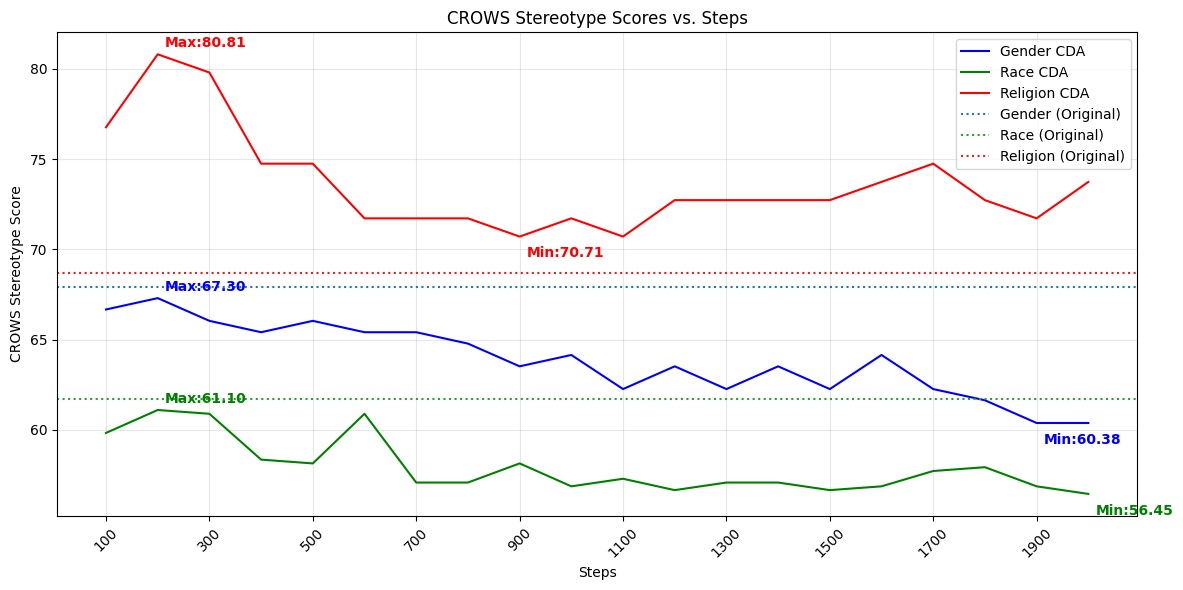

In [12]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Plot crows stereotype score vs step
# Left axis: crows stereotype score for 3 categories gender, race, religion
# Bottom axis: Step

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Function to plot a line and label its max and min points
def plot_line_with_labels(ax, x, y, color, label):
    line, = ax.plot(x, y, color=color, label=label)
    
    # Find max and min points
    max_index = np.argmax(y)
    min_index = np.argmin(y)
    
    # Label max point
    ax.annotate(f'Max:{y[max_index]:.2f}', 
                (x[max_index], y[max_index]),
                xytext=(5, 5), textcoords='offset points',
                color=color, fontweight='bold')
    
    # Label min point
    ax.annotate(f'Min:{y[min_index]:.2f}', 
                (x[min_index], y[min_index]),
                xytext=(5, -15), textcoords='offset points',
                color=color, fontweight='bold')
    
    return line

# Plot CROWS stereotype scores with labels
gender_line = plot_line_with_labels(ax, steps, gender_scores, 'blue', 'Gender CDA')
race_line = plot_line_with_labels(ax, steps, race_scores, 'green', 'Race CDA')
religion_line = plot_line_with_labels(ax, steps, religion_scores, 'red', 'Religion CDA')

# Set labels and title
ax.set_xlabel('Steps')
ax.set_ylabel('CROWS Stereotype Score')
ax.set_title('CROWS Stereotype Scores vs. Steps')

# Draw line for original stereotype score crows and add labels
ax.axhline(y=crows_before_debias_ss_gender, color='tab:blue', linestyle='dotted', label='Gender (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_gender, f' {stereoset_before_debias_ss_gender:.2f}', 
#         va='center', ha='left', color='tab:blue')

ax.axhline(y=crows_before_debias_ss_race, color='tab:green', linestyle='dotted', label='Race (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_race, f' {stereoset_before_debias_ss_race:.2f}', 
#         va='center', ha='left', color='tab:green')

ax.axhline(y=crows_before_debias_ss_religion, color='tab:red', linestyle='dotted', label='Religion (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_religion, f' {stereoset_before_debias_ss_religion:.2f}', 
#         va='center', ha='left', color='tab:red')

# Add legend
ax.legend(loc='upper right')

# Add grid
plt.grid(True, alpha=0.3)

# Adjust x-axis ticks
plt.xticks(steps[::2], rotation=45)  # Show every other step label, rotated 45 degrees

# Show the plot
plt.tight_layout()
plt.show()

# Save chart in media dir
fig.savefig('media/cda/phi2_cda_crows.png')

# Plot line chart for training steps vs stereoset benchmarks

In [13]:
# Set data
steps = [d['step'] for d in training_logs_cleaned['gender']]
gender_scores = {}
race_scores = {}
religion_scores = {}
# Extract gender stereotype scores
for key, value in stereoset_results_after['gender'].items():
    gender_scores[key] = value['intrasentence']['gender']['SS Score']
# Extract race stereotype scores
for key, value in stereoset_results_after['race-color'].items():
    race_scores[key] = value['intrasentence']['race']['SS Score']
# Extract religion stereotype scores
for key, value in stereoset_results_after['religion'].items():
    religion_scores[key] = value['intrasentence']['religion']['SS Score']
    
# Sort the steps and scores in step order
steps = sorted([int(step) for step in gender_scores.keys()])
gender_scores = [gender_scores[str(step)] for step in steps]
race_scores = [race_scores[str(step)] for step in steps]
religion_scores = [religion_scores[str(step)] for step in steps]

# Extract before debias stereoset benchmark data
stereoset_before_debias_ss_gender = stereoset_results_before['gender']['SS Score']
stereoset_before_debias_ss_race = stereoset_results_before['race']['SS Score']
stereoset_before_debias_ss_religion = stereoset_results_before['religion']['SS Score']

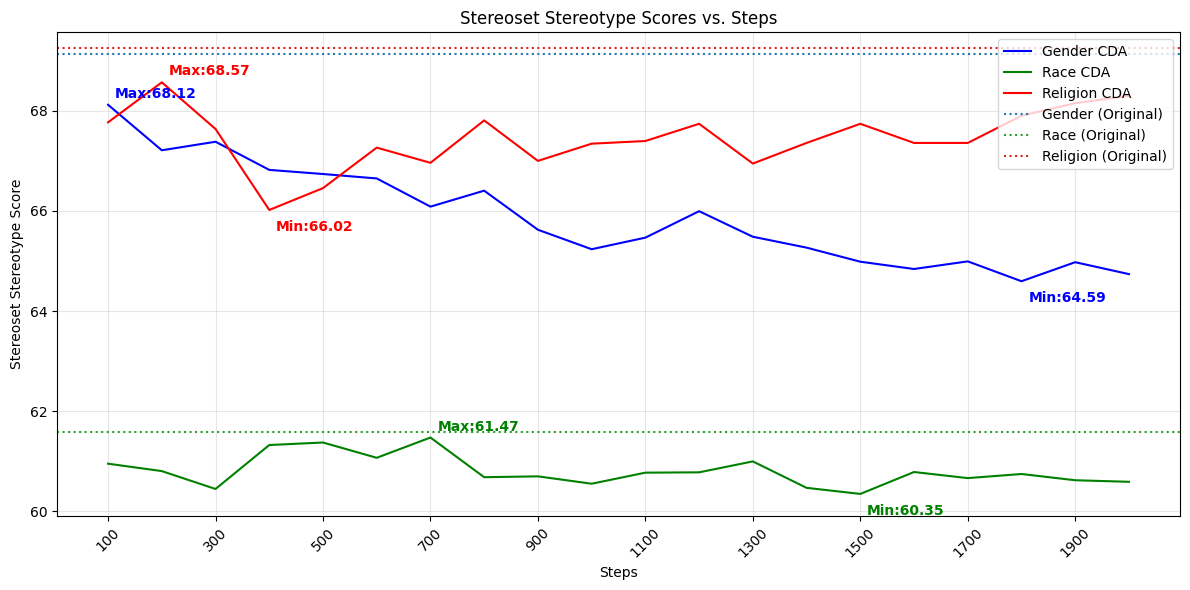

In [14]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Plot crows stereotype score vs step
# Left axis: crows stereotype score for 3 categories gender, race, religion
# Bottom axis: Step

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Function to plot a line and label its max and min points
def plot_line_with_labels(ax, x, y, color, label):
    line, = ax.plot(x, y, color=color, label=label)
    
    # Find max and min points
    max_index = np.argmax(y)
    min_index = np.argmin(y)
    
    # Label max point
    ax.annotate(f'Max:{y[max_index]:.2f}', 
                (x[max_index], y[max_index]),
                xytext=(5, 5), textcoords='offset points',
                color=color, fontweight='bold')
    
    # Label min point
    ax.annotate(f'Min:{y[min_index]:.2f}', 
                (x[min_index], y[min_index]),
                xytext=(5, -15), textcoords='offset points',
                color=color, fontweight='bold')
    
    return line

# Plot CROWS stereotype scores with labels
gender_line = plot_line_with_labels(ax, steps, gender_scores, 'blue', 'Gender CDA')
race_line = plot_line_with_labels(ax, steps, race_scores, 'green', 'Race CDA')
religion_line = plot_line_with_labels(ax, steps, religion_scores, 'red', 'Religion CDA')

# Set labels and title
ax.set_xlabel('Steps')
ax.set_ylabel('Stereoset Stereotype Score')
ax.set_title('Stereoset Stereotype Scores vs. Steps')

# Draw line for original stereotype score crows and add labels
ax.axhline(y=stereoset_before_debias_ss_gender, color='tab:blue', linestyle='dotted', label='Gender (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_gender, f' {stereoset_before_debias_ss_gender:.2f}', 
#         va='center', ha='left', color='tab:blue')

ax.axhline(y=stereoset_before_debias_ss_race, color='tab:green', linestyle='dotted', label='Race (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_race, f' {stereoset_before_debias_ss_race:.2f}', 
#         va='center', ha='left', color='tab:green')

ax.axhline(y=stereoset_before_debias_ss_religion, color='tab:red', linestyle='dotted', label='Religion (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_religion, f' {stereoset_before_debias_ss_religion:.2f}', 
#         va='center', ha='left', color='tab:red')

# Add legend
ax.legend(loc='upper right')

# Add grid
plt.grid(True, alpha=0.3)

# Adjust x-axis ticks
plt.xticks(steps[::2], rotation=45)  # Show every other step label, rotated 45 degrees

# Show the plot
plt.tight_layout()
plt.show()

# Save chart in media dir
fig.savefig('media/cda/phi2_cda_stereoset.png')

# Plot loss vs. step graph

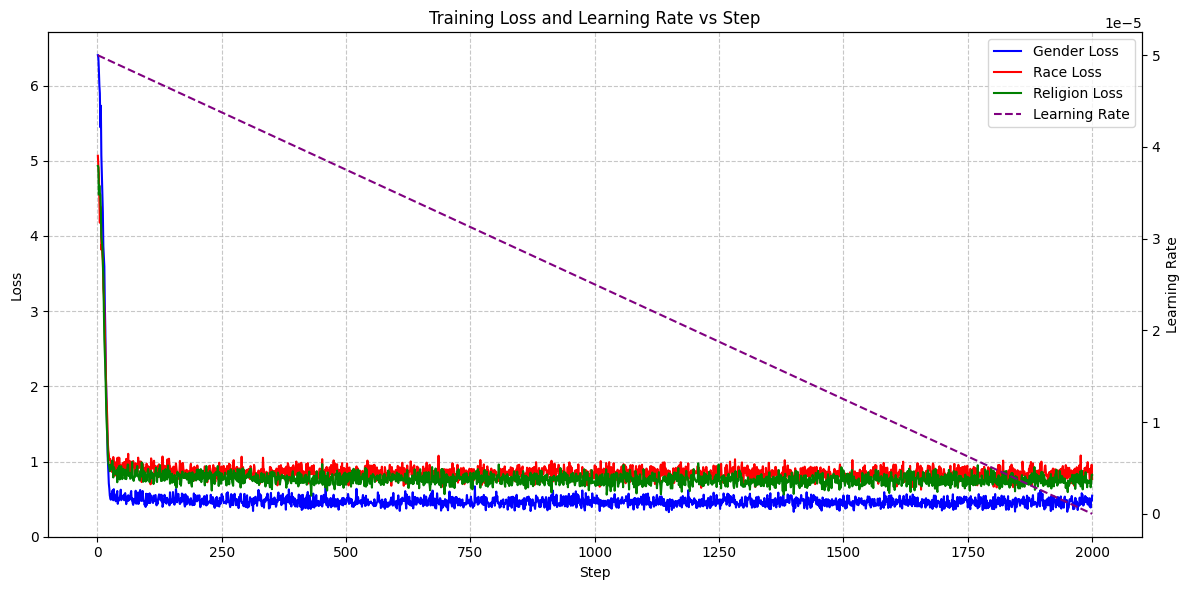

In [15]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Plot training loss vs step
# Left axis: loss
# Bottom axis: Step

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Extract key values from training data
steps = [d['step'] for d in training_logs_cleaned['gender']]
gender_losses = [d['loss'] for d in training_logs_cleaned['gender']]
race_losses = [d['loss'] for d in training_logs_cleaned['race']]
religion_losses = [d['loss'] for d in training_logs_cleaned['religion']]
learning_rate = [d['learning_rate'] for d in training_logs_cleaned['gender']]


# Plot loss vs step on the primary y-axis
ax1.plot(steps, gender_losses, label='Gender Loss', color='blue')
ax1.plot(steps, race_losses, label='Race Loss', color='red')
ax1.plot(steps, religion_losses, label='Religion Loss', color='green')

# Set labels and title for the primary y-axis
ax1.set_xlabel('Step')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss and Learning Rate vs Step')

# Adjust y-axis to start from 0
ax1.set_ylim(bottom=0)

# Create a secondary y-axis for learning rate
ax2 = ax1.twinx()
ax2.plot(steps, learning_rate, label='Learning Rate', color='purple', linestyle='--')
ax2.set_ylabel('Learning Rate')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Save chart in media dir
fig.savefig('media/cda/phi2_cda_loss_step.png')

# Plot training sample sizes per category

In [16]:
# Load training results
training_results = {}
for category_dir in phi_training_output_dir:
    with open(f'{category_dir}/train_results.json', 'r') as f:
        training_results[category_dir.split('/')[-1]] = json.load(f)

In [17]:
gender_samples = training_results['gender']['train_samples']
race_samples = training_results['race']['train_samples']
religion_samples = training_results['religion']['train_samples']

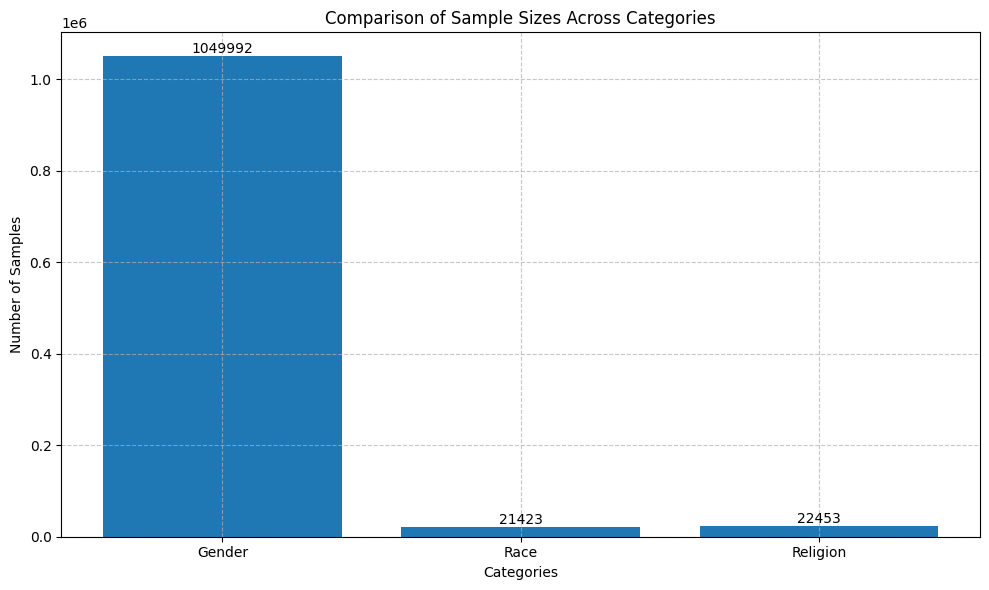

In [18]:
categories = ['Gender', 'Race', 'Religion']
sample_sizes = [gender_samples, race_samples, religion_samples]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
bars = ax.bar(categories, sample_sizes)

# Customize the chart
ax.set_title('Comparison of Sample Sizes Across Categories')
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Samples')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

# Add some color
plt.style.use('ggplot')

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure to disk
fig.savefig('media/cda/phi2_cda_sample_sizes.png')

# Llama 2 (Repeat above graphs)

In [1]:
categories = ['gender', 'race-color', 'religion']

llama_stereoset_results_dir = [f'../results/stereoset_CDA_processed/llama2/{category}' for category in categories]
llama_crows_results = [f'../results/crows_CDA/crows_m-CDALlama2LMHeadModel_c-meta-llama_Llama-2-7b-hf_t-{category}.json' for category in categories]
llama_training_output_dir = [f'../results/CDA_FT/llama2/{category}' for category in ['gender', 'race', 'religion']]

llama_before_debias_stereoset_results_dir = '../results/stereoset_processed/stereoset_m-LlamaForCausalLM_c-meta-llama_Llama-2-7b-hf_s-42.json'
llama_before_debias_crows_results_dir = '../results/crows/crows_m-LlamaForCausalLM_c-meta-llama_Llama-2-7b-hf.json'

In [2]:
# Load datas from directories
import json

# Load training data
training_logs = {}
for category_dir in llama_training_output_dir:
    with open(f'{category_dir}/trainer_state.json', 'r') as f:
        training_logs[category_dir.split('/')[-1]] = json.load(f)

# Load stereoset data (Before)
with open(f'{llama_before_debias_stereoset_results_dir}', 'r') as f:
    stereoset_results_before = json.load(f)

# Load stereoset data (After)
stereoset_results_after = {}
for category_dir in llama_stereoset_results_dir:
    with open(f'{category_dir}/combined.json', 'r') as f:
        stereoset_results_after[category_dir.split('/')[-1]] = json.load(f)
# Load crows data (Before)
with open(f'{llama_before_debias_crows_results_dir}', 'r') as f:
    crows_results_before = json.load(f)
# Load crows data (After)
crows_results_after = {}
for category_dir in llama_crows_results:
    with open(category_dir, 'r') as f:
        crows_results_after['gender' if 'gender' in category_dir else 'race' if 'race' in category_dir else 'religion'] = json.load(f)

# Process data

In [3]:
# Extract key values from training data
training_logs_cleaned = {category: training_logs[category]["log_history"][:-1] for category in training_logs.keys()} # Exclude last entry because it is the final train results

# Go into first key for before stereoset data
stereoset_results_before = stereoset_results_before[list(stereoset_results_before.keys())[0]]['intrasentence']

# Plot line chart for training steps vs crows benchmarks

In [4]:
# Set data
steps = [d['step'] for d in training_logs_cleaned['gender']]
gender_scores = {}
race_scores = {}
religion_scores = {}
# Extract gender stereotype scores
for key, value in crows_results_after['gender'].items():
    gender_scores[key] = value['gender']['Stereotype score']
# Extract race stereotype scores
for key, value in crows_results_after['race'].items():
    race_scores[key] = value['race-color']['Stereotype score']
# Extract religion stereotype scores
for key, value in crows_results_after['religion'].items():
    religion_scores[key] = value['religion']['Stereotype score']

# Sort the steps and scores in step order
steps = sorted([int(step) for step in gender_scores.keys()])
gender_scores = [gender_scores[str(step)] for step in steps]
race_scores = [race_scores[str(step)] for step in steps]
religion_scores = [religion_scores[str(step)] for step in steps]

# Extract before debias stereoset benchmark data
crows_before_debias_ss_gender = crows_results_before['gender']['Stereotype score']
crows_before_debias_ss_race = crows_results_before['race-color']['Stereotype score']
crows_before_debias_ss_religion = crows_results_before['religion']['Stereotype score']

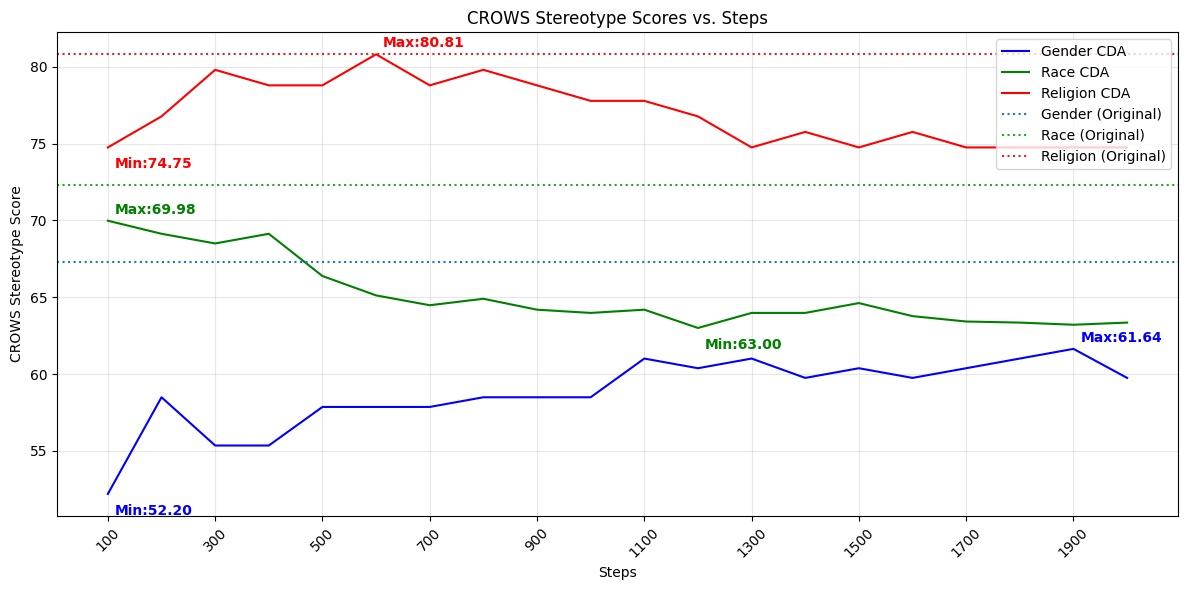

In [5]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Plot crows stereotype score vs step
# Left axis: crows stereotype score for 3 categories gender, race, religion
# Bottom axis: Step

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Function to plot a line and label its max and min points
def plot_line_with_labels(ax, x, y, color, label):
    line, = ax.plot(x, y, color=color, label=label)

    # Find max and min points
    max_index = np.argmax(y)
    min_index = np.argmin(y)

    # Label max point
    ax.annotate(f'Max:{y[max_index]:.2f}',
                (x[max_index], y[max_index]),
                xytext=(5, 5), textcoords='offset points',
                color=color, fontweight='bold')

    # Label min point
    ax.annotate(f'Min:{y[min_index]:.2f}',
                (x[min_index], y[min_index]),
                xytext=(5, -15), textcoords='offset points',
                color=color, fontweight='bold')

    return line

# Plot CROWS stereotype scores with labels
gender_line = plot_line_with_labels(ax, steps, gender_scores, 'blue', 'Gender CDA')
race_line = plot_line_with_labels(ax, steps, race_scores, 'green', 'Race CDA')
religion_line = plot_line_with_labels(ax, steps, religion_scores, 'red', 'Religion CDA')

# Set labels and title
ax.set_xlabel('Steps')
ax.set_ylabel('CROWS Stereotype Score')
ax.set_title('CROWS Stereotype Scores vs. Steps')

# Draw line for original stereotype score crows and add labels
ax.axhline(y=crows_before_debias_ss_gender, color='tab:blue', linestyle='dotted', label='Gender (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_gender, f' {stereoset_before_debias_ss_gender:.2f}',
#         va='center', ha='left', color='tab:blue')

ax.axhline(y=crows_before_debias_ss_race, color='tab:green', linestyle='dotted', label='Race (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_race, f' {stereoset_before_debias_ss_race:.2f}',
#         va='center', ha='left', color='tab:green')

ax.axhline(y=crows_before_debias_ss_religion, color='tab:red', linestyle='dotted', label='Religion (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_religion, f' {stereoset_before_debias_ss_religion:.2f}',
#         va='center', ha='left', color='tab:red')

# Add legend
ax.legend(loc='upper right')

# Add grid
plt.grid(True, alpha=0.3)

# Adjust x-axis ticks
plt.xticks(steps[::2], rotation=45)  # Show every other step label, rotated 45 degrees

# Show the plot
plt.tight_layout()
plt.show()

# Save chart in media dir
fig.savefig('media/cda/llama2_cda_crows.png')

# Plot line chart for training steps vs stereoset benchmarks

In [6]:
# Set data
steps = [d['step'] for d in training_logs_cleaned['gender']]
gender_scores = {}
race_scores = {}
religion_scores = {}
# Extract gender stereotype scores
for key, value in stereoset_results_after['gender'].items():
    gender_scores[key] = value['intrasentence']['gender']['SS Score']
# Extract race stereotype scores
for key, value in stereoset_results_after['race-color'].items():
    race_scores[key] = value['intrasentence']['race']['SS Score']
# Extract religion stereotype scores
for key, value in stereoset_results_after['religion'].items():
    religion_scores[key] = value['intrasentence']['religion']['SS Score']

# Sort the steps and scores in step order
steps = sorted([int(step) for step in gender_scores.keys()])
gender_scores = [gender_scores[str(step)] for step in steps]
race_scores = [race_scores[str(step)] for step in steps]
religion_scores = [religion_scores[str(step)] for step in steps]

# Extract before debias stereoset benchmark data
stereoset_before_debias_ss_gender = stereoset_results_before['gender']['SS Score']
stereoset_before_debias_ss_race = stereoset_results_before['race']['SS Score']
stereoset_before_debias_ss_religion = stereoset_results_before['religion']['SS Score']

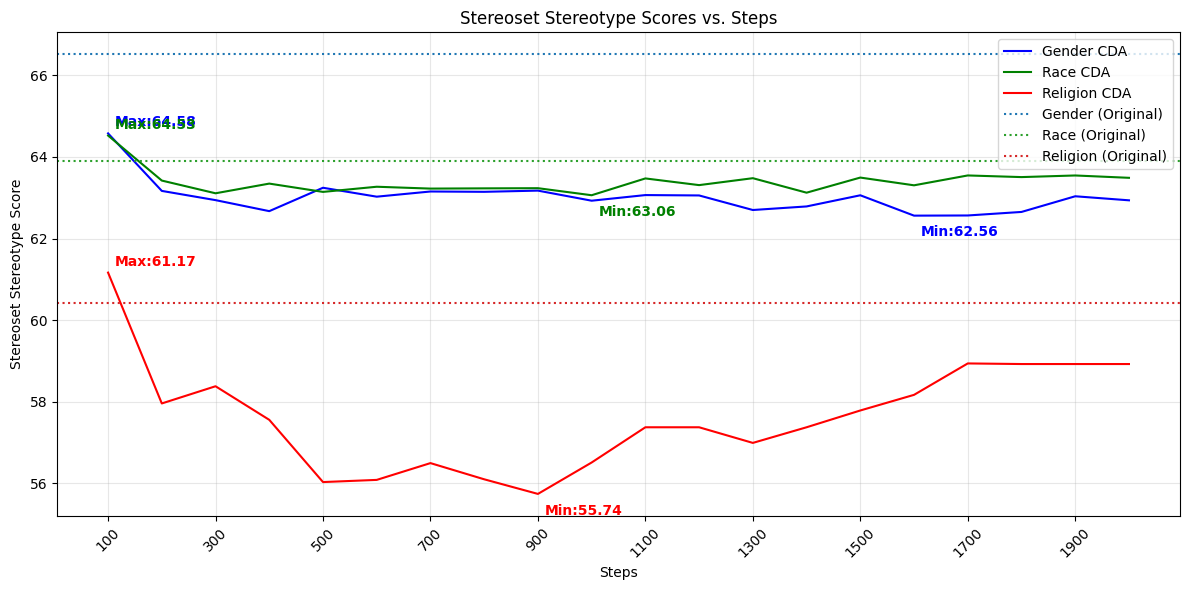

In [7]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Plot crows stereotype score vs step
# Left axis: crows stereotype score for 3 categories gender, race, religion
# Bottom axis: Step

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Function to plot a line and label its max and min points
def plot_line_with_labels(ax, x, y, color, label):
    line, = ax.plot(x, y, color=color, label=label)

    # Find max and min points
    max_index = np.argmax(y)
    min_index = np.argmin(y)

    # Label max point
    ax.annotate(f'Max:{y[max_index]:.2f}',
                (x[max_index], y[max_index]),
                xytext=(5, 5), textcoords='offset points',
                color=color, fontweight='bold')

    # Label min point
    ax.annotate(f'Min:{y[min_index]:.2f}',
                (x[min_index], y[min_index]),
                xytext=(5, -15), textcoords='offset points',
                color=color, fontweight='bold')

    return line

# Plot CROWS stereotype scores with labels
gender_line = plot_line_with_labels(ax, steps, gender_scores, 'blue', 'Gender CDA')
race_line = plot_line_with_labels(ax, steps, race_scores, 'green', 'Race CDA')
religion_line = plot_line_with_labels(ax, steps, religion_scores, 'red', 'Religion CDA')

# Set labels and title
ax.set_xlabel('Steps')
ax.set_ylabel('Stereoset Stereotype Score')
ax.set_title('Stereoset Stereotype Scores vs. Steps')

# Draw line for original stereotype score crows and add labels
ax.axhline(y=stereoset_before_debias_ss_gender, color='tab:blue', linestyle='dotted', label='Gender (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_gender, f' {stereoset_before_debias_ss_gender:.2f}',
#         va='center', ha='left', color='tab:blue')

ax.axhline(y=stereoset_before_debias_ss_race, color='tab:green', linestyle='dotted', label='Race (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_race, f' {stereoset_before_debias_ss_race:.2f}',
#         va='center', ha='left', color='tab:green')

ax.axhline(y=stereoset_before_debias_ss_religion, color='tab:red', linestyle='dotted', label='Religion (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_religion, f' {stereoset_before_debias_ss_religion:.2f}',
#         va='center', ha='left', color='tab:red')

# Add legend
ax.legend(loc='upper right')

# Add grid
plt.grid(True, alpha=0.3)

# Adjust x-axis ticks
plt.xticks(steps[::2], rotation=45)  # Show every other step label, rotated 45 degrees

# Show the plot
plt.tight_layout()
plt.show()

# Save chart in media dir
fig.savefig('media/cda/llama2_cda_stereoset.png')

# Plot loss vs. step graph

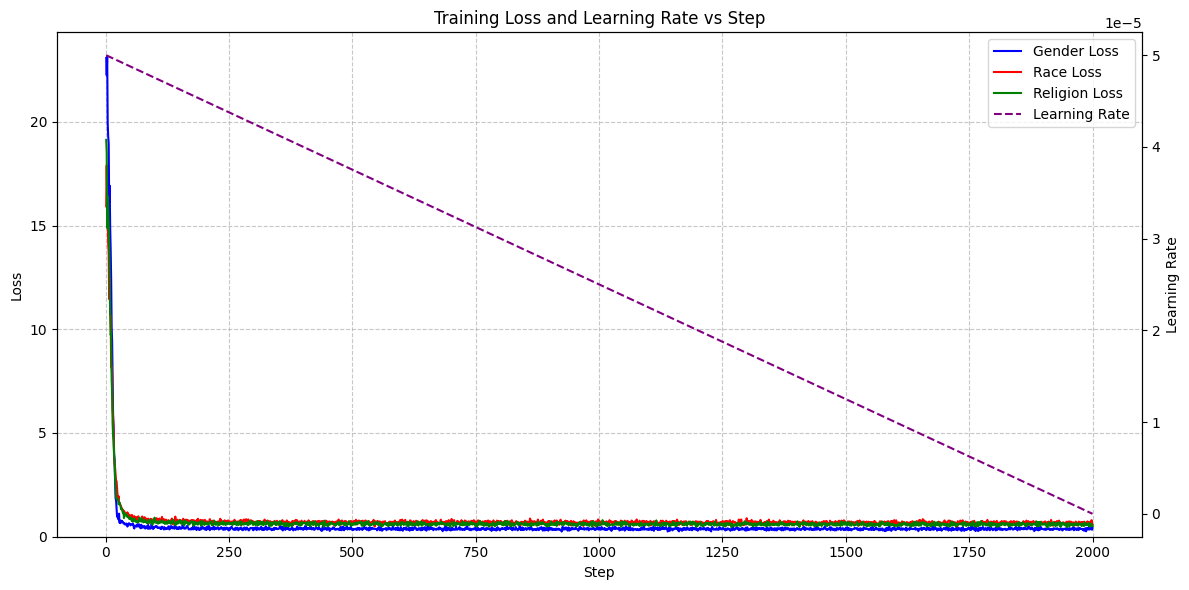

In [8]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Plot training loss vs step
# Left axis: loss
# Bottom axis: Step

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Extract key values from training data
steps = [d['step'] for d in training_logs_cleaned['gender']]
gender_losses = [d['loss'] for d in training_logs_cleaned['gender']]
race_losses = [d['loss'] for d in training_logs_cleaned['race']]
religion_losses = [d['loss'] for d in training_logs_cleaned['religion']]
learning_rate = [d['learning_rate'] for d in training_logs_cleaned['gender']]


# Plot loss vs step on the primary y-axis
ax1.plot(steps, gender_losses, label='Gender Loss', color='blue')
ax1.plot(steps, race_losses, label='Race Loss', color='red')
ax1.plot(steps, religion_losses, label='Religion Loss', color='green')

# Set labels and title for the primary y-axis
ax1.set_xlabel('Step')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss and Learning Rate vs Step')

# Adjust y-axis to start from 0
ax1.set_ylim(bottom=0)

# Create a secondary y-axis for learning rate
ax2 = ax1.twinx()
ax2.plot(steps, learning_rate, label='Learning Rate', color='purple', linestyle='--')
ax2.set_ylabel('Learning Rate')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Save chart in media dir
fig.savefig('media/cda/llama2_cda_loss_step.png')

# Plot training sample sizes per category

In [9]:
# Load training results
training_results = {}
for category_dir in llama_training_output_dir:
    with open(f'{category_dir}/train_results.json', 'r') as f:
        training_results[category_dir.split('/')[-1]] = json.load(f)

In [10]:
gender_samples = training_results['gender']['train_samples']
race_samples = training_results['race']['train_samples']
religion_samples = training_results['religion']['train_samples']

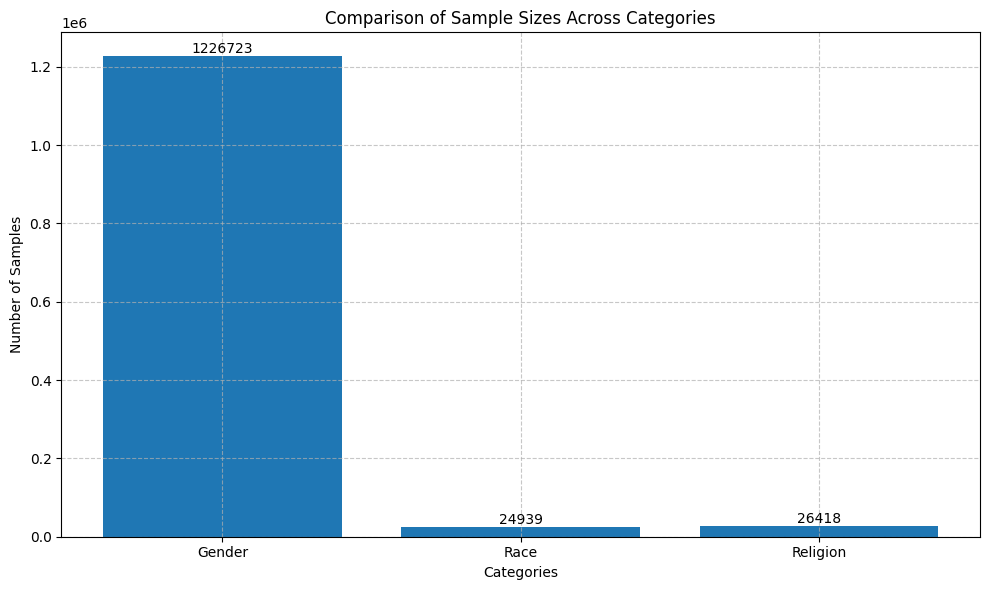

In [11]:
categories = ['Gender', 'Race', 'Religion']
sample_sizes = [gender_samples, race_samples, religion_samples]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
bars = ax.bar(categories, sample_sizes)

# Customize the chart
ax.set_title('Comparison of Sample Sizes Across Categories')
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Samples')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

# Add some color
plt.style.use('ggplot')

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure to disk
fig.savefig('media/cda/llama2_cda_sample_sizes.png')

# GPT2

In [1]:
categories = ['gender', 'race-color', 'religion']

gpt_stereoset_results_dir = [f'../results/stereoset_CDA_processed/gpt2/{category}' for category in categories]
gpt_crows_results = [f'../results/crows_CDA/crows_m-CDAGPT2LMHeadModel_c-gpt2_t-{category}.json' for category in categories]
gpt_training_output_dir = [f'../results/CDA_FT/gpt2/{category}' for category in ['gender', 'race', 'religion']]

gpt_before_debias_stereoset_results_dir = '../results/stereoset_processed/stereoset_m-GPT2LMHeadModel_c-gpt2_s-42.json'
gpt_before_debias_crows_results_dir = '../results/crows/crows_m-GPT2LMHeadModel_c-gpt2.json'

In [2]:
# Load datas from directories
import json

# Load training data
training_logs = {}
for category_dir in gpt_training_output_dir:
    with open(f'{category_dir}/trainer_state.json', 'r') as f:
        training_logs[category_dir.split('/')[-1]] = json.load(f)

# Load stereoset data (Before)
with open(f'{gpt_before_debias_stereoset_results_dir}', 'r') as f:
    stereoset_results_before = json.load(f)

# Load stereoset data (After)
stereoset_results_after = {}
for category_dir in gpt_stereoset_results_dir:
    with open(f'{category_dir}/combined.json', 'r') as f:
        stereoset_results_after[category_dir.split('/')[-1]] = json.load(f)
# Load crows data (Before)
with open(f'{gpt_before_debias_crows_results_dir}', 'r') as f:
    crows_results_before = json.load(f)
# Load crows data (After)
crows_results_after = {}
for category_dir in gpt_crows_results:
    with open(category_dir, 'r') as f:
        crows_results_after['gender' if 'gender' in category_dir else 'race' if 'race' in category_dir else 'religion'] = json.load(f)

# Process data

In [3]:
# Extract key values from training data
training_logs_cleaned = {category: training_logs[category]["log_history"][:-1] for category in training_logs.keys()} # Exclude last entry because it is the final train results

# Go into first key for before stereoset data
stereoset_results_before = stereoset_results_before[list(stereoset_results_before.keys())[0]]['intrasentence']

# Plot line chart for training steps vs crows benchmarks

In [4]:
# Set data
steps = [d['step'] for d in training_logs_cleaned['gender']]
gender_scores = {}
race_scores = {}
religion_scores = {}
# Extract gender stereotype scores
for key, value in crows_results_after['gender'].items():
    gender_scores[key] = value['gender']['Stereotype score']
# Extract race stereotype scores
for key, value in crows_results_after['race'].items():
    race_scores[key] = value['race-color']['Stereotype score']
# Extract religion stereotype scores
for key, value in crows_results_after['religion'].items():
    religion_scores[key] = value['religion']['Stereotype score']

# Sort the steps and scores in step order
steps = sorted([int(step) for step in gender_scores.keys()])
gender_scores = [gender_scores[str(step)] for step in steps]
race_scores = [race_scores[str(step)] for step in steps]
religion_scores = [religion_scores[str(step)] for step in steps]

# Extract before debias stereoset benchmark data
crows_before_debias_ss_gender = crows_results_before['gender']['Stereotype score']
crows_before_debias_ss_race = crows_results_before['race-color']['Stereotype score']
crows_before_debias_ss_religion = crows_results_before['religion']['Stereotype score']

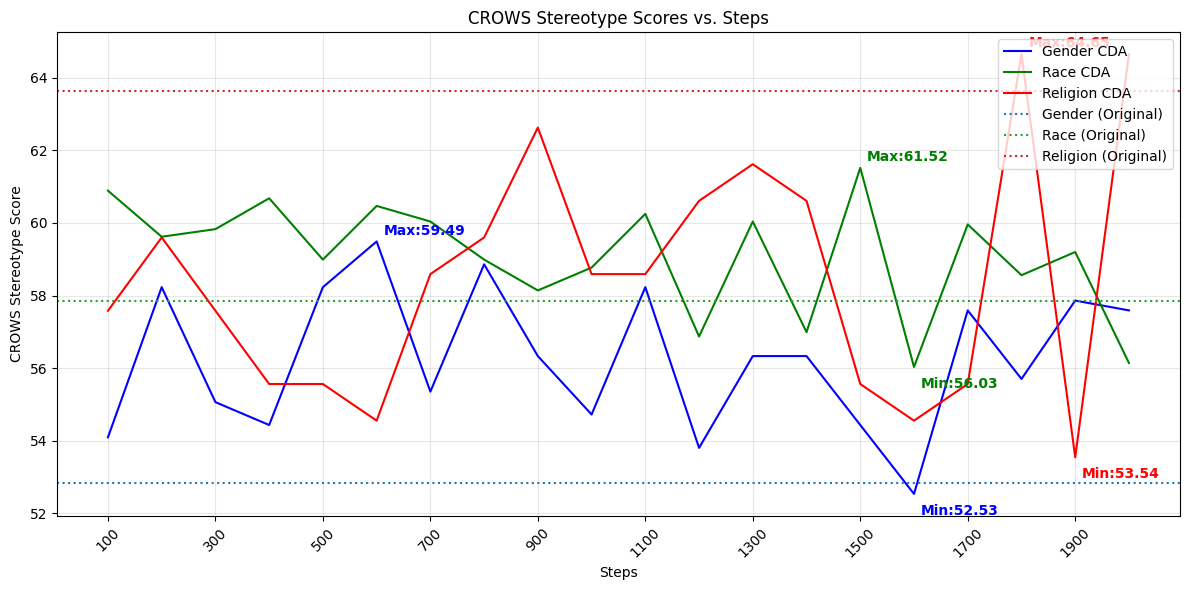

In [5]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Plot crows stereotype score vs step
# Left axis: crows stereotype score for 3 categories gender, race, religion
# Bottom axis: Step

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Function to plot a line and label its max and min points
def plot_line_with_labels(ax, x, y, color, label):
    line, = ax.plot(x, y, color=color, label=label)

    # Find max and min points
    max_index = np.argmax(y)
    min_index = np.argmin(y)

    # Label max point
    ax.annotate(f'Max:{y[max_index]:.2f}',
                (x[max_index], y[max_index]),
                xytext=(5, 5), textcoords='offset points',
                color=color, fontweight='bold')

    # Label min point
    ax.annotate(f'Min:{y[min_index]:.2f}',
                (x[min_index], y[min_index]),
                xytext=(5, -15), textcoords='offset points',
                color=color, fontweight='bold')

    return line

# Plot CROWS stereotype scores with labels
gender_line = plot_line_with_labels(ax, steps, gender_scores, 'blue', 'Gender CDA')
race_line = plot_line_with_labels(ax, steps, race_scores, 'green', 'Race CDA')
religion_line = plot_line_with_labels(ax, steps, religion_scores, 'red', 'Religion CDA')

# Set labels and title
ax.set_xlabel('Steps')
ax.set_ylabel('CROWS Stereotype Score')
ax.set_title('CROWS Stereotype Scores vs. Steps')

# Draw line for original stereotype score crows and add labels
ax.axhline(y=crows_before_debias_ss_gender, color='tab:blue', linestyle='dotted', label='Gender (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_gender, f' {stereoset_before_debias_ss_gender:.2f}',
#         va='center', ha='left', color='tab:blue')

ax.axhline(y=crows_before_debias_ss_race, color='tab:green', linestyle='dotted', label='Race (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_race, f' {stereoset_before_debias_ss_race:.2f}',
#         va='center', ha='left', color='tab:green')

ax.axhline(y=crows_before_debias_ss_religion, color='tab:red', linestyle='dotted', label='Religion (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_religion, f' {stereoset_before_debias_ss_religion:.2f}',
#         va='center', ha='left', color='tab:red')

# Add legend
ax.legend(loc='upper right')

# Add grid
plt.grid(True, alpha=0.3)

# Adjust x-axis ticks
plt.xticks(steps[::2], rotation=45)  # Show every other step label, rotated 45 degrees

# Show the plot
plt.tight_layout()
plt.show()

# Save chart in media dir
fig.savefig('media/cda/gpt2_cda_crows.png')

# Plot line chart for training steps vs stereoset benchmarks

In [6]:
# Set data
steps = [d['step'] for d in training_logs_cleaned['gender']]
gender_scores = {}
race_scores = {}
religion_scores = {}
# Extract gender stereotype scores
for key, value in stereoset_results_after['gender'].items():
    gender_scores[key] = value['intrasentence']['gender']['SS Score']
# Extract race stereotype scores
for key, value in stereoset_results_after['race-color'].items():
    race_scores[key] = value['intrasentence']['race']['SS Score']
# Extract religion stereotype scores
for key, value in stereoset_results_after['religion'].items():
    religion_scores[key] = value['intrasentence']['religion']['SS Score']

# Sort the steps and scores in step order
steps = sorted([int(step) for step in gender_scores.keys()])
gender_scores = [gender_scores[str(step)] for step in steps]
race_scores = [race_scores[str(step)] for step in steps]
religion_scores = [religion_scores[str(step)] for step in steps]

# Extract before debias stereoset benchmark data
stereoset_before_debias_ss_gender = stereoset_results_before['gender']['SS Score']
stereoset_before_debias_ss_race = stereoset_results_before['race']['SS Score']
stereoset_before_debias_ss_religion = stereoset_results_before['religion']['SS Score']

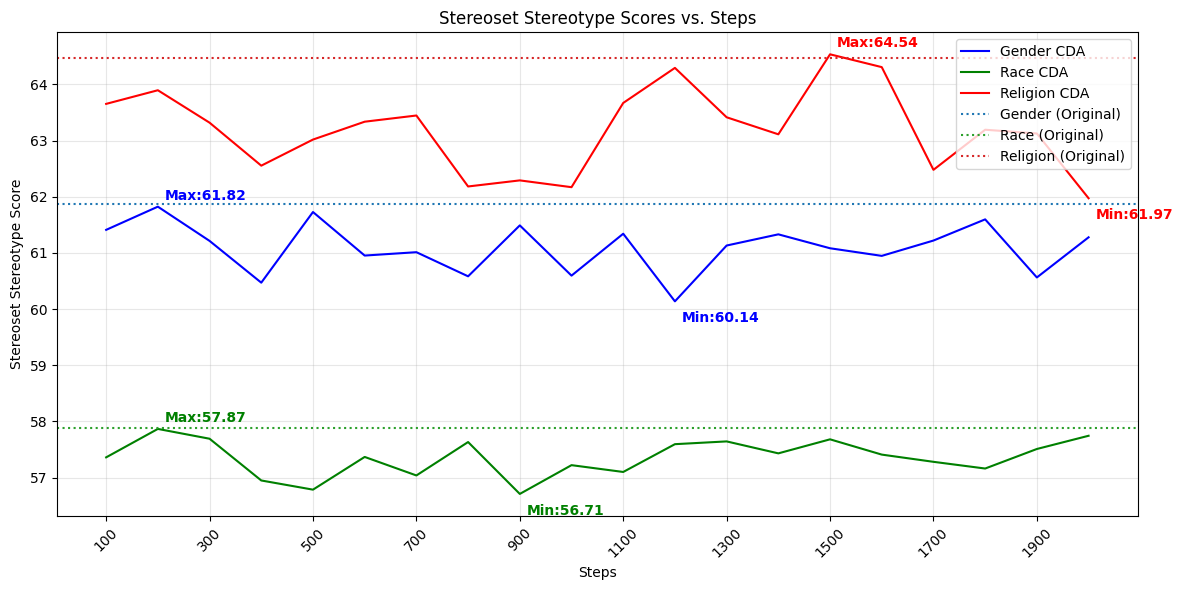

In [7]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Plot crows stereotype score vs step
# Left axis: crows stereotype score for 3 categories gender, race, religion
# Bottom axis: Step

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Function to plot a line and label its max and min points
def plot_line_with_labels(ax, x, y, color, label):
    line, = ax.plot(x, y, color=color, label=label)

    # Find max and min points
    max_index = np.argmax(y)
    min_index = np.argmin(y)

    # Label max point
    ax.annotate(f'Max:{y[max_index]:.2f}',
                (x[max_index], y[max_index]),
                xytext=(5, 5), textcoords='offset points',
                color=color, fontweight='bold')

    # Label min point
    ax.annotate(f'Min:{y[min_index]:.2f}',
                (x[min_index], y[min_index]),
                xytext=(5, -15), textcoords='offset points',
                color=color, fontweight='bold')

    return line

# Plot CROWS stereotype scores with labels
gender_line = plot_line_with_labels(ax, steps, gender_scores, 'blue', 'Gender CDA')
race_line = plot_line_with_labels(ax, steps, race_scores, 'green', 'Race CDA')
religion_line = plot_line_with_labels(ax, steps, religion_scores, 'red', 'Religion CDA')

# Set labels and title
ax.set_xlabel('Steps')
ax.set_ylabel('Stereoset Stereotype Score')
ax.set_title('Stereoset Stereotype Scores vs. Steps')

# Draw line for original stereotype score crows and add labels
ax.axhline(y=stereoset_before_debias_ss_gender, color='tab:blue', linestyle='dotted', label='Gender (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_gender, f' {stereoset_before_debias_ss_gender:.2f}',
#         va='center', ha='left', color='tab:blue')

ax.axhline(y=stereoset_before_debias_ss_race, color='tab:green', linestyle='dotted', label='Race (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_race, f' {stereoset_before_debias_ss_race:.2f}',
#         va='center', ha='left', color='tab:green')

ax.axhline(y=stereoset_before_debias_ss_religion, color='tab:red', linestyle='dotted', label='Religion (Original)')
# ax.text(ax.get_xlim()[1], stereoset_before_debias_ss_religion, f' {stereoset_before_debias_ss_religion:.2f}',
#         va='center', ha='left', color='tab:red')

# Add legend
ax.legend(loc='upper right')

# Add grid
plt.grid(True, alpha=0.3)

# Adjust x-axis ticks
plt.xticks(steps[::2], rotation=45)  # Show every other step label, rotated 45 degrees

# Show the plot
plt.tight_layout()
plt.show()

# Save chart in media dir
fig.savefig('media/cda/gpt2_cda_stereoset.png')

# Plot loss vs. step graph

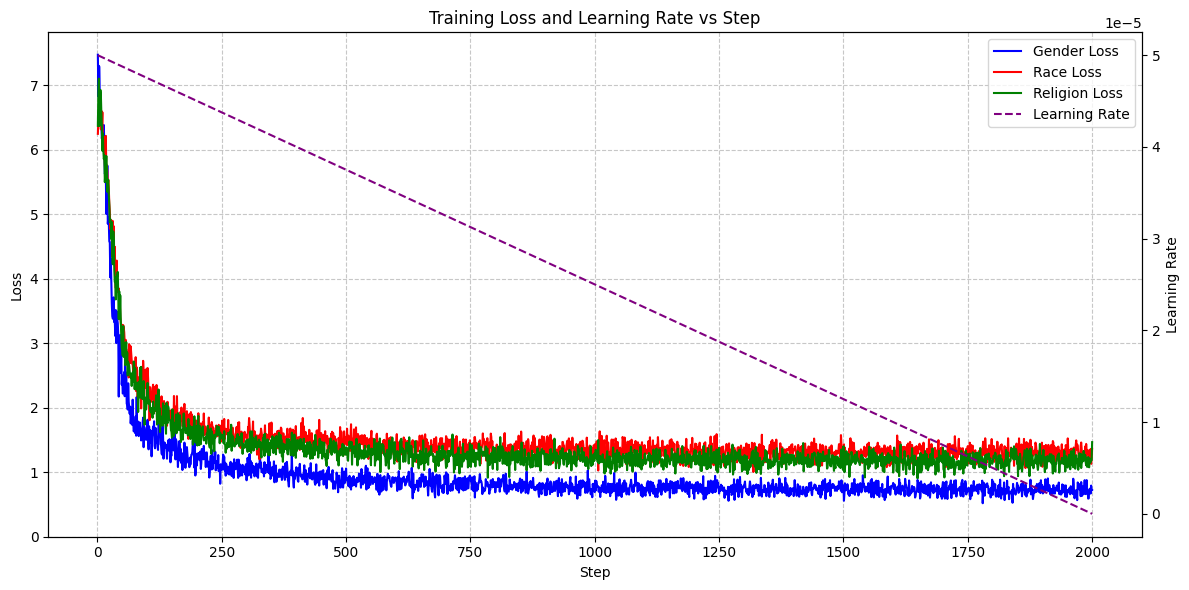

In [8]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Plot training loss vs step
# Left axis: loss
# Bottom axis: Step

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Extract key values from training data
steps = [d['step'] for d in training_logs_cleaned['gender']]
gender_losses = [d['loss'] for d in training_logs_cleaned['gender']]
race_losses = [d['loss'] for d in training_logs_cleaned['race']]
religion_losses = [d['loss'] for d in training_logs_cleaned['religion']]
learning_rate = [d['learning_rate'] for d in training_logs_cleaned['gender']]


# Plot loss vs step on the primary y-axis
ax1.plot(steps, gender_losses, label='Gender Loss', color='blue')
ax1.plot(steps, race_losses, label='Race Loss', color='red')
ax1.plot(steps, religion_losses, label='Religion Loss', color='green')

# Set labels and title for the primary y-axis
ax1.set_xlabel('Step')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss and Learning Rate vs Step')

# Adjust y-axis to start from 0
ax1.set_ylim(bottom=0)

# Create a secondary y-axis for learning rate
ax2 = ax1.twinx()
ax2.plot(steps, learning_rate, label='Learning Rate', color='purple', linestyle='--')
ax2.set_ylabel('Learning Rate')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Add grid
ax1.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Save chart in media dir
fig.savefig('media/cda/gpt2_cda_loss_step.png')

# Plot training sample sizes per category

In [9]:
# Load training results
training_results = {}
for category_dir in gpt_training_output_dir:
    with open(f'{category_dir}/train_results.json', 'r') as f:
        training_results[category_dir.split('/')[-1]] = json.load(f)

In [10]:
gender_samples = training_results['gender']['train_samples']
race_samples = training_results['race']['train_samples']
religion_samples = training_results['religion']['train_samples']

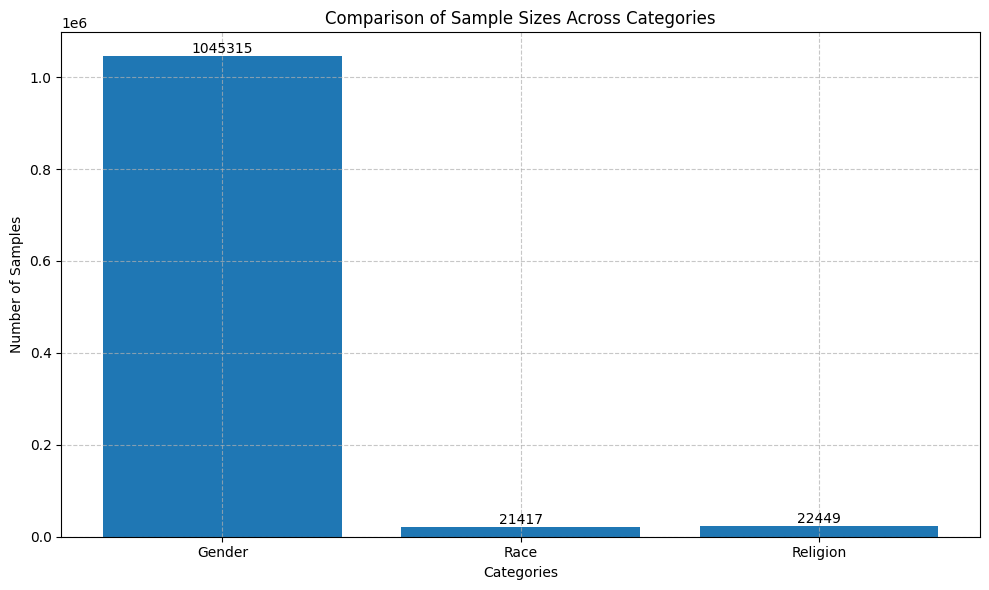

In [11]:
categories = ['Gender', 'Race', 'Religion']
sample_sizes = [gender_samples, race_samples, religion_samples]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
bars = ax.bar(categories, sample_sizes)

# Customize the chart
ax.set_title('Comparison of Sample Sizes Across Categories')
ax.set_xlabel('Categories')
ax.set_ylabel('Number of Samples')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height}',
            ha='center', va='bottom')

# Add some color
plt.style.use('ggplot')

# Add grid
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure to disk
fig.savefig('media/cda/gpt2_cda_sample_sizes.png')

# Overall plot model comparision (before & after)

In [1]:
# Load all data stereoset & crows
categories = ['gender', 'race-color', 'religion']

gpt_stereoset_results_dir = [f'../results/stereoset_CDA_processed/gpt2/{category}' for category in categories]
gpt_crows_results = [f'../results/crows_CDA/crows_m-CDAGPT2LMHeadModel_c-gpt2_t-{category}.json' for category in categories]
gpt_training_output_dir = [f'../results/CDA_FT/gpt2/{category}' for category in ['gender', 'race', 'religion']]

gpt_before_debias_stereoset_results_dir = '../results/stereoset_processed/stereoset_m-GPT2LMHeadModel_c-gpt2_s-42.json'
gpt_before_debias_crows_results_dir = '../results/crows/crows_m-GPT2LMHeadModel_c-gpt2.json'

llama_stereoset_results_dir = [f'../results/stereoset_CDA_processed/llama2/{category}' for category in categories]
llama_crows_results = [f'../results/crows_CDA/crows_m-CDALlama2LMHeadModel_c-meta-llama_Llama-2-7b-hf_t-{category}.json' for category in categories]
llama_training_output_dir = [f'../results/CDA_FT/llama2/{category}' for category in ['gender', 'race', 'religion']]

llama_before_debias_stereoset_results_dir = '../results/stereoset_processed/stereoset_m-LlamaForCausalLM_c-meta-llama_Llama-2-7b-hf_s-42.json'
llama_before_debias_crows_results_dir = '../results/crows/crows_m-LlamaForCausalLM_c-meta-llama_Llama-2-7b-hf.json'

phi_stereoset_results_dir = [f'../results/stereoset_CDA_processed/phi2/{category}' for category in categories]
phi_crows_results = [f'../results/crows_CDA/crows_m-CDAPhi2LMHeadModel_c-microsoft_phi-2_t-{category}.json' for category in categories]
phi_training_output_dir = [f'../results/CDA_FT/phi2/{category}' for category in ['gender', 'race', 'religion']]

phi_before_debias_stereoset_results_dir = '../results/stereoset_processed/stereoset_m-PhiForCausalLM_c-microsoft_phi-2_s-42.json'
phi_before_debias_crows_results_dir = '../results/crows/crows_m-PhiForCausalLM_c-microsoft_phi-2.json'

# Process data

In [2]:
# Load datas from directories
import json

# Load training data
phi_training_logs = {}
for category_dir in phi_training_output_dir:
    with open(f'{category_dir}/trainer_state.json', 'r') as f:
       phi_training_logs[category_dir.split('/')[-1]] = json.load(f)

# Load stereoset data (Before)
with open(f'{phi_before_debias_stereoset_results_dir}', 'r') as f:
    phi_stereoset_results_before = json.load(f)

# Load stereoset data (After)
phi_stereoset_results_after = {}
for category_dir in phi_stereoset_results_dir:
    with open(f'{category_dir}/combined.json', 'r') as f:
        phi_stereoset_results_after[category_dir.split('/')[-1]] = json.load(f)
# Load crows data (Before)
with open(f'{phi_before_debias_crows_results_dir}', 'r') as f:
    phi_crows_results_before = json.load(f)
# Load crows data (After)
phi_crows_results_after = {}
for category_dir in phi_crows_results:
    with open(category_dir, 'r') as f:
        phi_crows_results_after['gender' if 'gender' in category_dir else 'race' if 'race' in category_dir else 'religion'] = json.load(f)


# Load datas from directories
import json

# Load training data
llama_training_logs = {}
for category_dir in llama_training_output_dir:
    with open(f'{category_dir}/trainer_state.json', 'r') as f:
        llama_training_logs[category_dir.split('/')[-1]] = json.load(f)

# Load stereoset data (Before)
with open(f'{llama_before_debias_stereoset_results_dir}', 'r') as f:
    llama_stereoset_results_before = json.load(f)

# Load stereoset data (After)
llama_stereoset_results_after = {}
for category_dir in llama_stereoset_results_dir:
    with open(f'{category_dir}/combined.json', 'r') as f:
        llama_stereoset_results_after[category_dir.split('/')[-1]] = json.load(f)
# Load crows data (Before)
with open(f'{llama_before_debias_crows_results_dir}', 'r') as f:
    llama_crows_results_before = json.load(f)
# Load crows data (After)
llama_crows_results_after = {}
for category_dir in llama_crows_results:
    with open(category_dir, 'r') as f:
        llama_crows_results_after['gender' if 'gender' in category_dir else 'race' if 'race' in category_dir else 'religion'] = json.load(f)


# Load datas from directories
import json

# Load training data
gpt_training_logs = {}
for category_dir in gpt_training_output_dir:
    with open(f'{category_dir}/trainer_state.json', 'r') as f:
        gpt_training_logs[category_dir.split('/')[-1]] = json.load(f)

# Load stereoset data (Before)
with open(f'{gpt_before_debias_stereoset_results_dir}', 'r') as f:
    gpt_stereoset_results_before = json.load(f)

# Load stereoset data (After)
gpt_stereoset_results_after = {}
for category_dir in gpt_stereoset_results_dir:
    with open(f'{category_dir}/combined.json', 'r') as f:
        gpt_stereoset_results_after[category_dir.split('/')[-1]] = json.load(f)
# Load crows data (Before)
with open(f'{gpt_before_debias_crows_results_dir}', 'r') as f:
    gpt_crows_results_before = json.load(f)
# Load crows data (After)
gpt_crows_results_after = {}
for category_dir in gpt_crows_results:
    with open(category_dir, 'r') as f:
        gpt_crows_results_after['gender' if 'gender' in category_dir else 'race' if 'race' in category_dir else 'religion'] = json.load(f)

In [3]:
# Extract key values from training data
phi_training_logs_cleaned = {category: phi_training_logs[category]["log_history"][:-1] for category in phi_training_logs.keys()} # Exclude last entry because it is the final train results

# Go into first key for before stereoset data
phi_stereoset_results_before = phi_stereoset_results_before[list(phi_stereoset_results_before.keys())[0]]['intrasentence']

# Extract key values from training data
llama_training_logs_cleaned = {category: llama_training_logs[category]["log_history"][:-1] for category in llama_training_logs.keys()} # Exclude last entry because it is the final train results

# Go into first key for before stereoset data
llama_stereoset_results_before = llama_stereoset_results_before[list(llama_stereoset_results_before.keys())[0]]['intrasentence']


# Extract key values from training data
gpt_training_logs_cleaned = {category: gpt_training_logs[category]["log_history"][:-1] for category in gpt_training_logs.keys()} # Exclude last entry because it is the final train results

# Go into first key for before stereoset data
gpt_stereoset_results_before = gpt_stereoset_results_before[list(gpt_stereoset_results_before.keys())[0]]['intrasentence']

# Combine into 1 dict

In [4]:
# Combine crows into 1 dict
crows_data = {
    'llama2_original': llama_crows_results_before,
    'phi2_original': phi_crows_results_before,
    'gpt2_original': gpt_crows_results_before,
    'llama2': llama_crows_results_after,
    'phi2': phi_crows_results_after,
    'gpt2': gpt_crows_results_after
}
# Combine stereoset into 1 dict
stereoset_data = {
    'llama2_original': llama_stereoset_results_before,
    'phi2_original': phi_stereoset_results_before,
    'gpt2_original': gpt_stereoset_results_before,
    'llama2': llama_stereoset_results_after,
    'phi2': phi_stereoset_results_after,
    'gpt2': gpt_stereoset_results_after
}

# Finaly plot

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def all_models_category_radar_chart(crows_data, stereoset_data):
    categories = ['gender', 'race', 'religion']
    models = ['llama2', 'phi2', 'gpt2', 'llama2_original', 'phi2_original', 'gpt2_original']

    angles = np.linspace(0, 2 * np.pi, len(categories) * 2, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))  # complete the circle

    fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=dict(projection='polar'))

    def get_crows_category(cat):
        if cat.lower() == 'race':
            return 'race-color'
        return cat.lower()

    max_values = np.zeros(len(angles) - 1)  # To store max values for each angle
    min_values = np.ones(len(angles) - 1) * 100  # To store min values for each angle

    # Define colors for each model pair
    colors = {'llama2': 'blue', 'phi2': 'green', 'gpt2': 'red'}

    for model in models:
        values = []
        for cat in categories:
            if 'original' in model:
                values.append(stereoset_data[model][cat]['SS Score'])
                values.append(crows_data[model][get_crows_category(cat)]['Stereotype score'])
            else:
                values.append(stereoset_data[model][get_crows_category(cat)]['2000']['intrasentence'][cat]['SS Score'])
                values.append(crows_data[model][cat]['2000'][get_crows_category(cat)]['Stereotype score'])
        values = np.concatenate((values, [values[0]]))  # complete the circle

        # Determine color and line style
        base_model = model.split('_')[0]
        color = colors[base_model]
        linestyle = '--' if 'original' in model else '-'

        ax.plot(angles, values, 'o-', linewidth=2, label=model, color=color, linestyle=linestyle)
        ax.fill(angles, values, alpha=0.25, color=color)

        # Update max_values and min_values
        max_values = np.maximum(max_values, values[:-1])  # Exclude the last repeated value
        min_values = np.minimum(min_values, values[:-1])  # Exclude the last repeated value

    # Calculate y-axis limits
    y_min = max(0, np.floor(min_values.min()) - 5)  # Lower bound, at least 0
    y_max = min(100, np.ceil(max_values.max()) + 5)  # Upper bound, at most 100

    # Add data labels for max and min values with improved positioning
    for i, (angle, max_val, min_val) in enumerate(zip(angles[:-1], max_values, min_values)):
        ha = 'left'
        va = 'bottom'
        xytext = (5, 5)

        # Adjust text alignment and position based on the angle
        if 0 <= angle < np.pi/2:  # Upper right quadrant
            ha = 'left'
            va = 'bottom'
        elif np.pi/2 <= angle < np.pi:  # Upper left quadrant
            ha = 'right'
            va = 'bottom'
            xytext = (-5, 5)
        elif np.pi <= angle < 3*np.pi/2:  # Lower left quadrant
            ha = 'right'
            va = 'top'
            xytext = (-5, -5)
        else:  # Lower right quadrant
            ha = 'left'
            va = 'top'
            xytext = (5, -5)

        ax.annotate(f'{max_val:.1f}', xy=(angle, max_val), xytext=xytext,
                    textcoords='offset points', ha=ha, va=va)
        ax.annotate(f'{min_val:.1f}', xy=(angle, min_val), xytext=xytext,
                    textcoords='offset points', ha=ha, va=va)

    ax.set_thetagrids(angles[:-1] * 180/np.pi,
                      [f'{cat}\n({dataset})' for cat in categories for dataset in ['Stereoset', 'Crows']])
    ax.set_ylim(y_min, y_max)
    ax.set_rlabel_position(0)  # Move radial labels away from plotted line
    ax.tick_params(pad=10)  # Increase padding between tick labels and plot

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title("Stereotype Scores Across Categories and Datasets", y=1.08)
    plt.tight_layout()
    plt.show()

    # Save chart in media dir
    fig.savefig('media/cda/stereoset_crows_ss_scores.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_3111573/1118711979.py:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(angles, values, 'o-', linewidth=2, label=model, color=color, linestyle=linestyle)


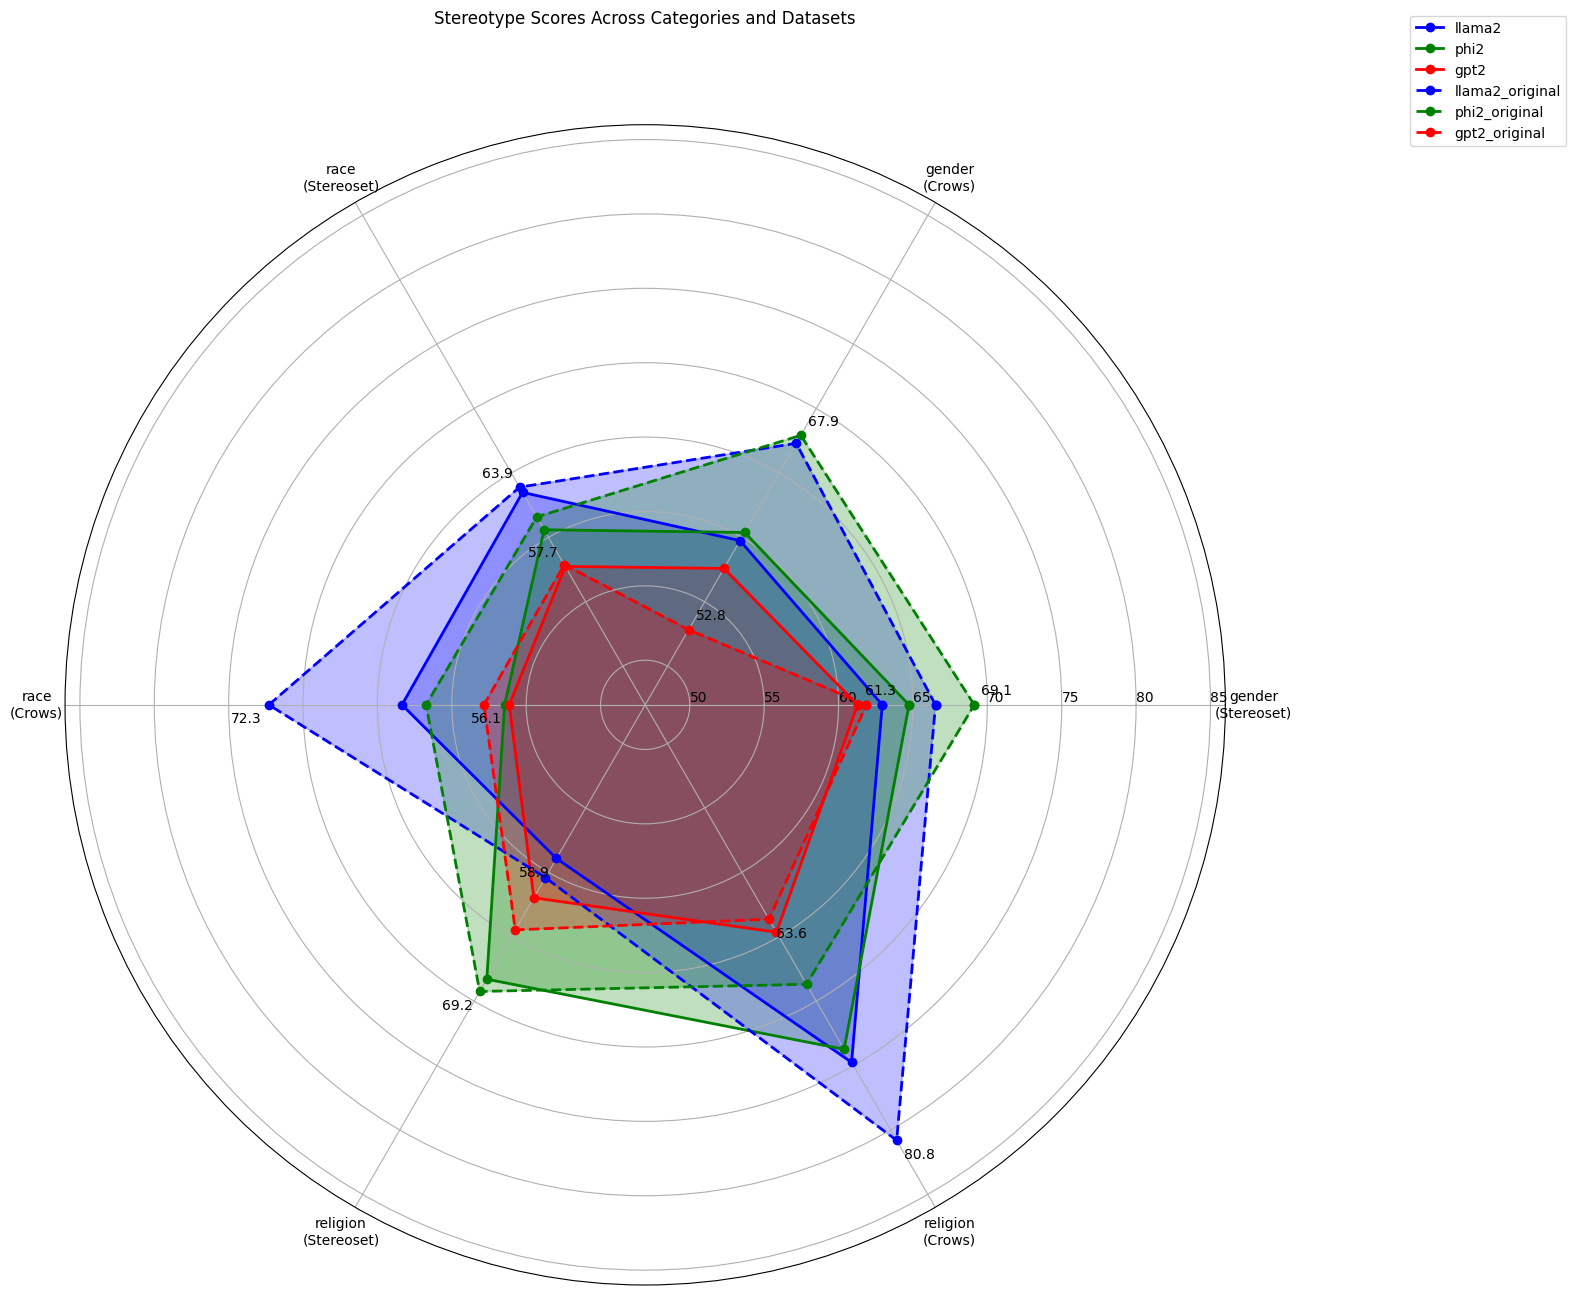

In [6]:
all_models_category_radar_chart(crows_data, stereoset_data)

# Bar chart instead

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def model_comparison_bar_chart(crows_data, stereoset_data):
    categories = ['gender', 'race', 'religion']
    models = ['llama2', 'phi2', 'gpt2']
    datasets = ['Stereoset', 'Crows']

    fig, axs = plt.subplots(2, 1, figsize=(18, 24), height_ratios=[3, 1])
    ax = axs[0]

    x = np.arange(len(categories))
    width = 0.08  # Reduced width
    group_width = width * len(models) * 2 * len(datasets)

    colors = plt.cm.Set3(np.linspace(0, 1, len(models) * len(datasets)))

    legend_elements = []

    for i, dataset in enumerate(datasets):
        for j, model in enumerate(models):
            original_values = []
            debiased_values = []

            for cat in categories:
                if dataset == 'Stereoset':
                    cat_key = cat if cat != 'race' else 'race-color'
                    original_values.append(stereoset_data[f"{model}_original"][cat]['SS Score'])
                    debiased_values.append(stereoset_data[model][cat_key]['2000']['intrasentence'][cat]['SS Score'])
                else:  # Crows
                    cat_key = cat if cat != 'race' else 'race-color'
                    original_values.append(crows_data[f"{model}_original"][cat_key]['Stereotype score'])
                    debiased_values.append(crows_data[model][cat]['2000'][cat_key]['Stereotype score'])

            offset = width * (i * len(models) * 2 + j * 2) - group_width / 2
            color = colors[i * len(models) + j]

            rects1 = ax.bar(x + offset, original_values, width, color=color, alpha=0.7, edgecolor='black', label=f'{model} ({dataset}) - Original')
            rects2 = ax.bar(x + offset + width, debiased_values, width, color=color, alpha=1, edgecolor='black', hatch='//', label=f'{model} ({dataset}) - Debiased')

            ax.bar_label(rects1, padding=3, rotation=90, fmt='%.1f', fontsize=8)
            ax.bar_label(rects2, padding=3, rotation=90, fmt='%.1f', fontsize=8)

            legend_elements.append(Patch(facecolor=color, edgecolor='black', alpha=0.7, label=f'{model} ({dataset}) - Original'))
            legend_elements.append(Patch(facecolor=color, edgecolor='black', alpha=1, hatch='//', label=f'{model} ({dataset}) - Debiased'))

    ax.set_ylabel('Stereotype Score')
    ax.set_title('Stereotype Scores Comparison: Original vs Debiased Models')
    ax.set_xticks(x, categories)
    ax.legend(handles=legend_elements, bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=3)
    ax.set_ylim(0, 100)

    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

    # Add a table with the exact values
    cell_text = []
    cell_colors = []
    for dataset in datasets:
        for model in models:
            row = [f"{model} ({dataset})"]
            row_colors = ['white']
            for cat in categories:
                if dataset == 'Stereoset':
                    cat_key = cat if cat != 'race' else 'race-color'
                    original = stereoset_data[f"{model}_original"][cat]['SS Score']
                    debiased = stereoset_data[model][cat_key]['2000']['intrasentence'][cat]['SS Score']
                else:  # Crows
                    cat_key = cat if cat != 'race' else 'race-color'
                    original = crows_data[f"{model}_original"][cat_key]['Stereotype score']
                    debiased = crows_data[model][cat]['2000'][cat_key]['Stereotype score']
                row.append(f"{original:.1f} → {debiased:.1f}")
                row_colors.append('white')
            cell_text.append(row)
            cell_colors.append(row_colors)

    # Find and highlight the lowest score for each category
    for col in range(1, len(categories) + 1):
        min_value = float('inf')
        min_indices = []
        for row in range(len(cell_text)):
            value = float(cell_text[row][col].split('→')[1].strip())
            if value < min_value:
                min_value = value
                min_indices = [row]
            elif value == min_value:
                min_indices.append(row)
        for row in min_indices:
            cell_colors[row][col] = 'lightgreen'

    table = axs[1].table(cellText=cell_text, colLabels=['Model'] + categories,
                         cellLoc='center', loc='center', cellColours=cell_colors)
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    axs[1].axis('off')

    plt.tight_layout()
    plt.savefig('media/cda/model_comparison_bar_chart.png', bbox_inches='tight', dpi=300)
    plt.show()

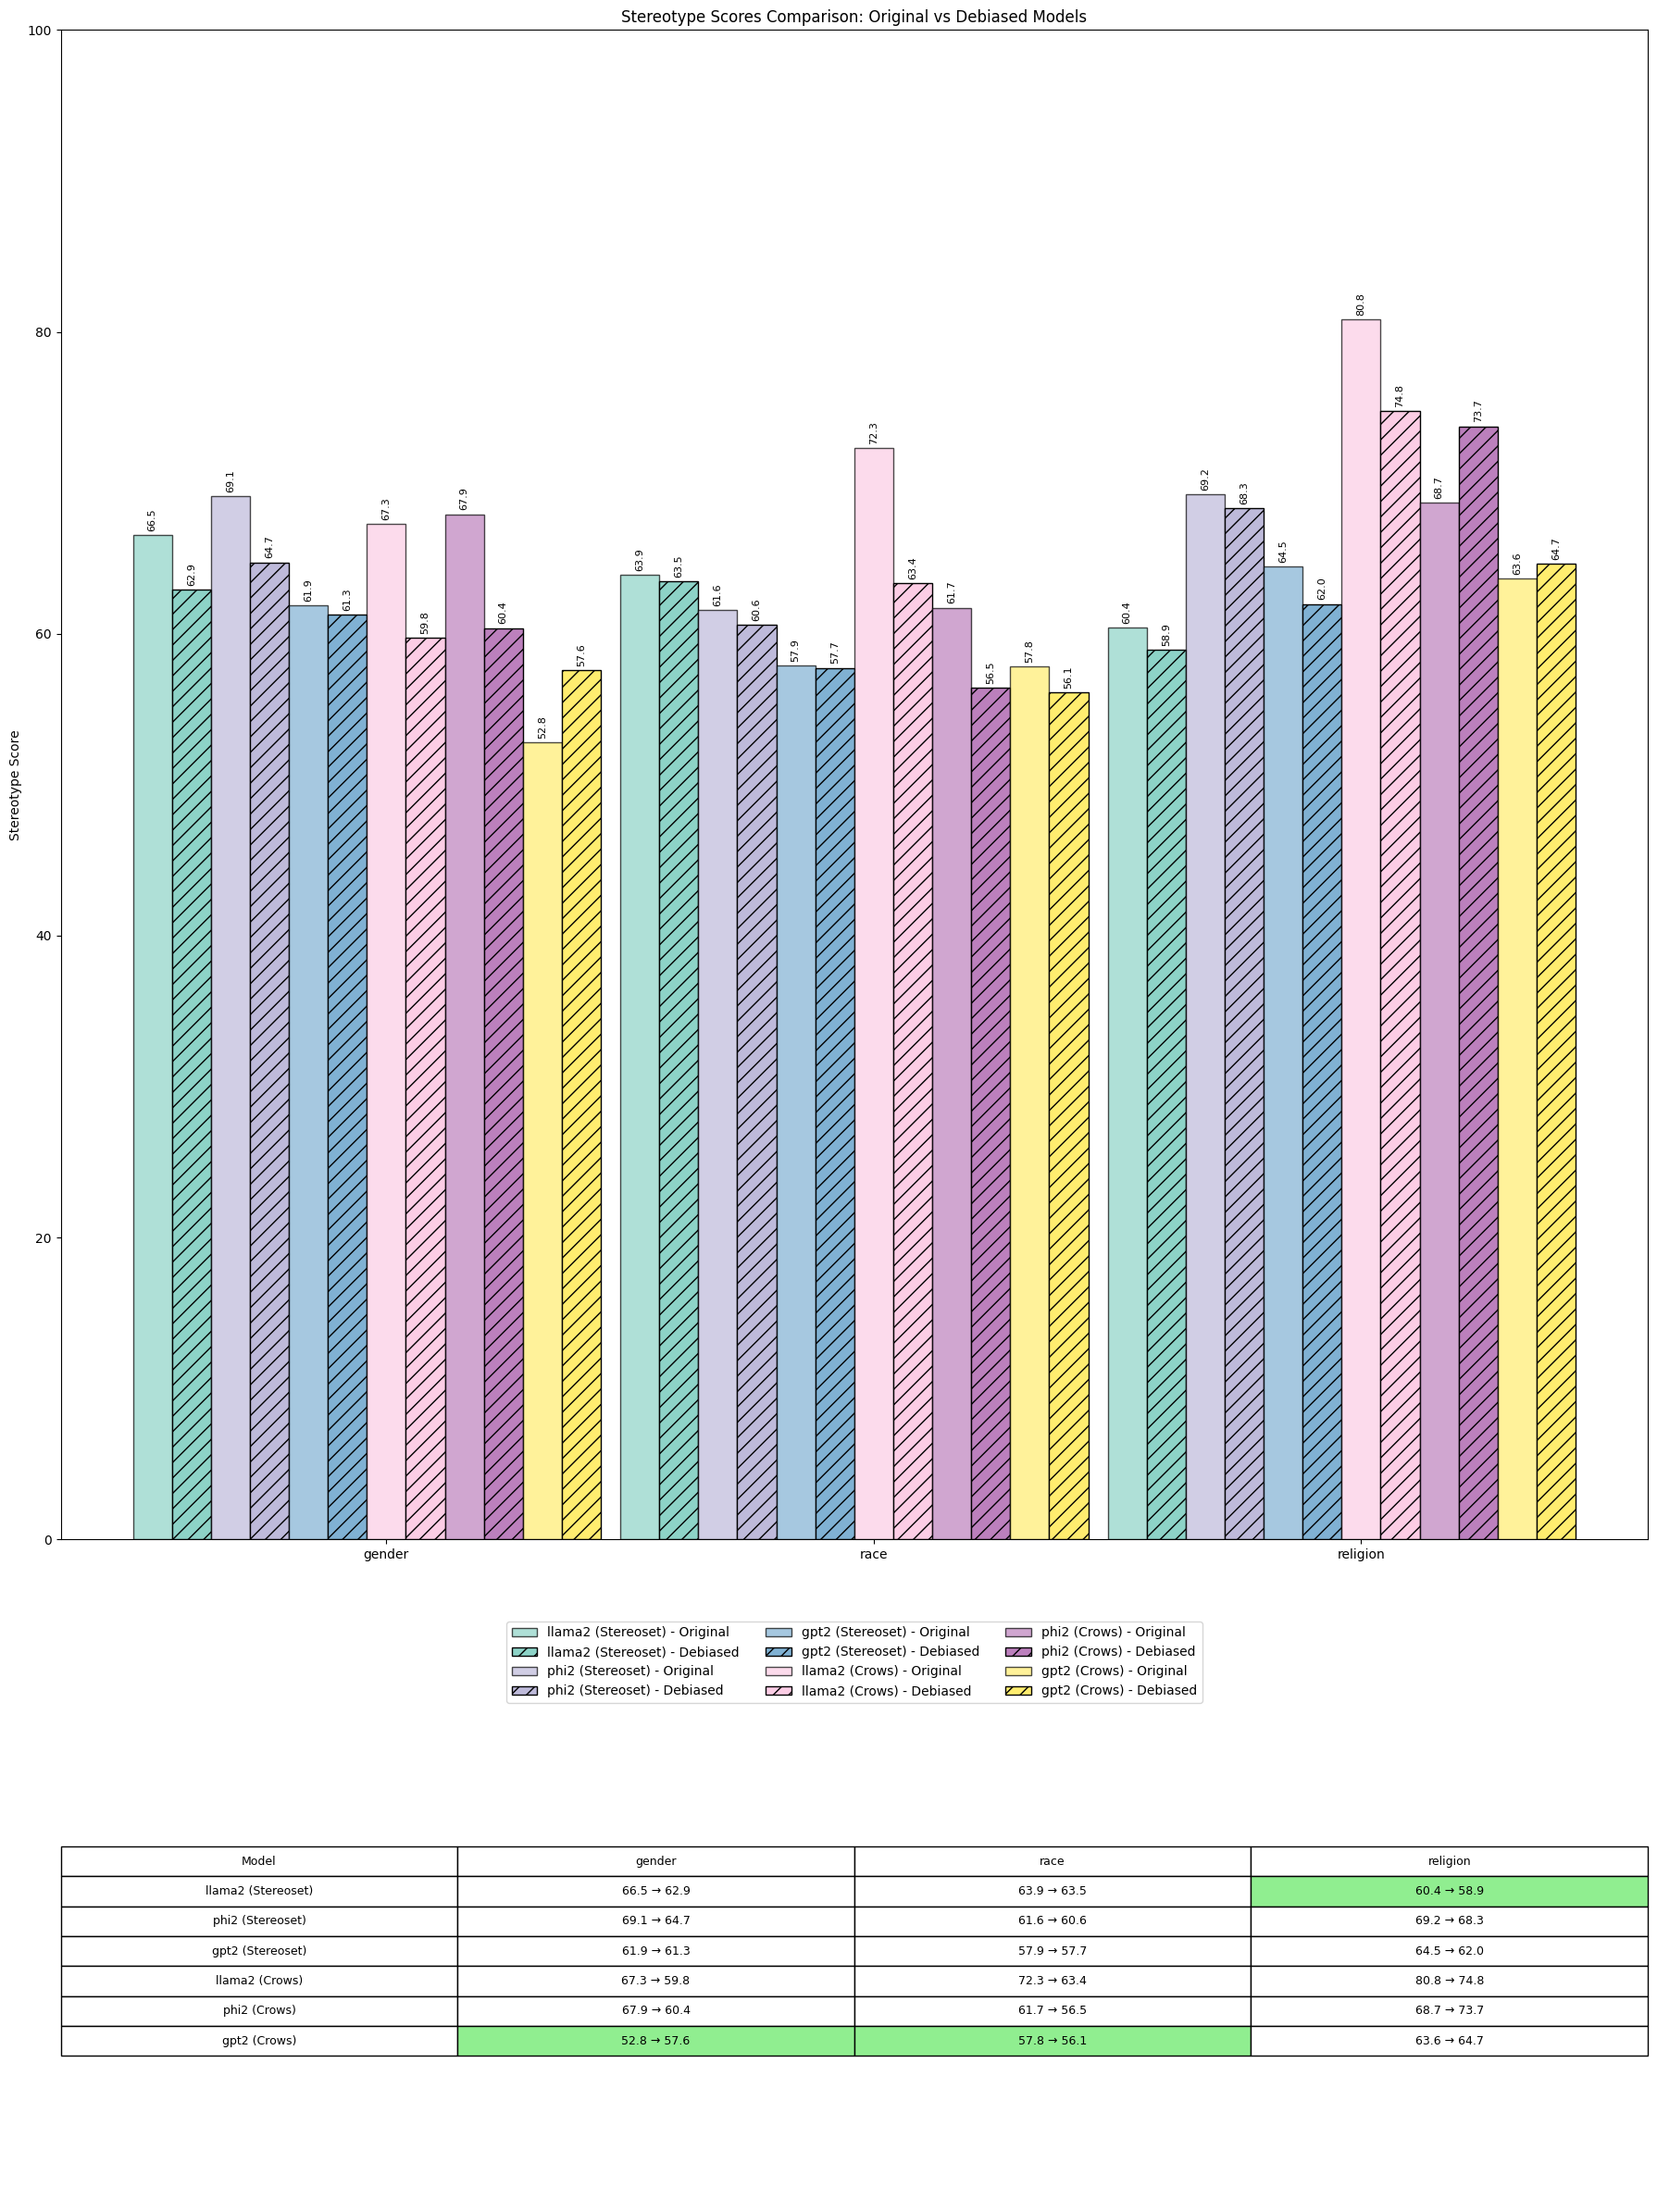

In [10]:
model_comparison_bar_chart(crows_data, stereoset_data)